## **simple linear regression height -> weight**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
pd.set_option('display.max_columns', None) # all columns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')

pandas  version = 1.1.5
numpy   version = 1.19.5
seaborn version = 0.11.1


In [6]:
pd.Timestamp.now()

Timestamp('2021-05-18 06:49:10.853682')

In [7]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/height_weight_gender.tsv'
df=pd.read_csv(url, sep='\t')
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
height,170,160,168,162,173,160,176,164,173,153,180,150,158,167,174,161,153,170,159,169,182,175
weight,72,47,67,50,52,48,65,49,90,47,85,40,47,56,74,45,42,52,51,50,71,70
gender,m,m,f,f,m,f,m,f,m,f,m,f,f,f,m,f,f,f,f,f,m,m


<Figure size 1152x648 with 0 Axes>

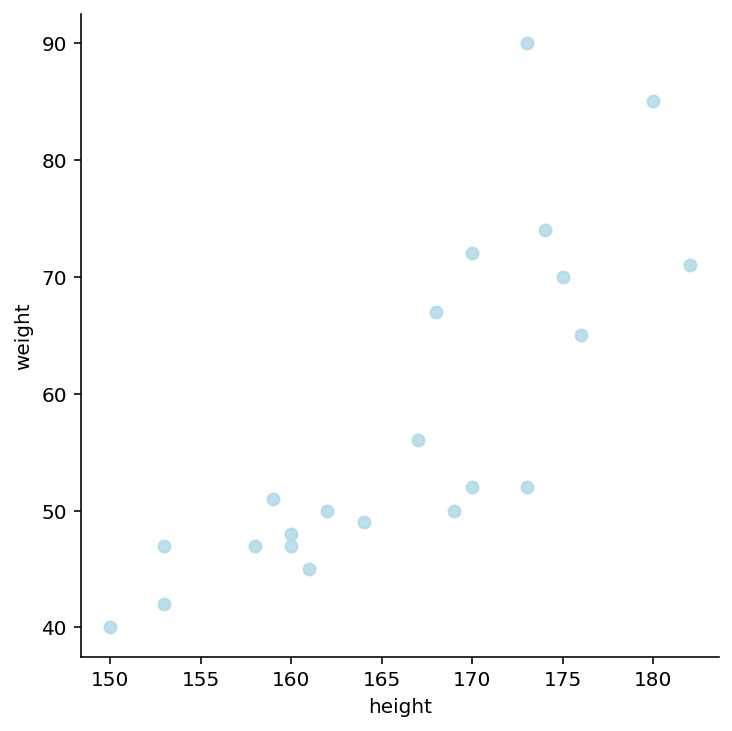

In [8]:
plt.figure(figsize=(16, 9))
sns.lmplot(x='height', y='weight', data=df, ci=None, fit_reg=False,
           scatter_kws={'color': 'lightblue'},
           line_kws={'color': 'orange'})

<Figure size 1152x648 with 0 Axes>

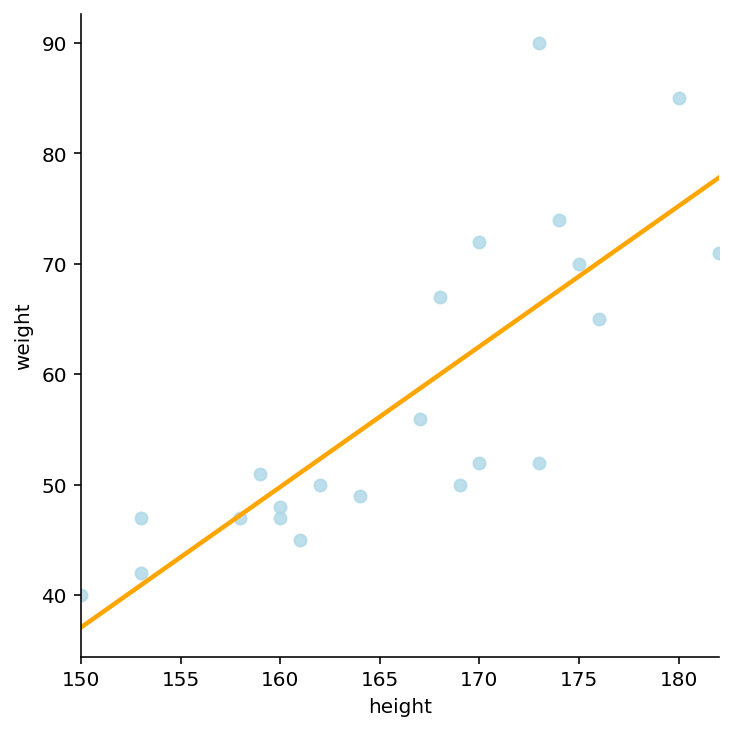

In [9]:
plt.figure(figsize=(16, 9))
sns.lmplot(x='height', y='weight', data=df, ci=None, fit_reg=True,
           scatter_kws={'color': 'lightblue'},
           line_kws={'color': 'orange'})

## **sklearn: LinearRegression**

In [10]:
import sklearn
from sklearn.linear_model import LinearRegression

In [11]:
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 0.22.2.post1


In [12]:
model = LinearRegression() # create object/instance (create an instance from LinearRegression class)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
X=df[['height']]
y=df['weight']

In [14]:
model.fit(X, y) # step 2: fitting model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
model.score(X, y) # step 3: model scoring (R-squared)

0.6421018274187128

In [16]:
model.intercept_

-153.70673405272493

In [17]:
model.coef_

array([1.27195738])

$y=\alpha+\beta x$

In [18]:
model.intercept_ + model.coef_ * 170

array([62.52602104])

In [19]:
# step 4: predicting
model.predict([
    [140],
    [150],
    [160],
    [170]
]) # numpy array: X 2-dim array

array([24.36729955, 37.08687338, 49.80644721, 62.52602104])

In [20]:
np.arange(140, 171, 10).reshape(-1, 1) # 2D

array([[140],
       [150],
       [160],
       [170]])

In [21]:
model.predict(np.arange(140, 171, 10).reshape(-1, 1).reshape(-1, 1))

array([24.36729955, 37.08687338, 49.80644721, 62.52602104])

## **Statsmodels: Simple Linear regression**

In [22]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [23]:
# formula: response ~ predictor1 + predictor2
model_a = smf.ols(formula='weight ~ height', data=df).fit()

In [24]:
model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     35.88
Date:                Tue, 18 May 2021   Prob (F-statistic):           7.40e-06
Time:                        06:52:09   Log-Likelihood:                -77.664
No. Observations:                  22   AIC:                             159.3
Df Residuals:                      20   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -153.7067     35.345     -4.349      0.000    -227.436     -79.978
height         1.2720      0.212      5.990      0.000       0.829       1.715
==============================================================================
Omnibus:                        5.247   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                3.084
Skew:                           0.760   Prob(JB):                        0.214
Kurtosis:                       4.028   Cond. No.                     3.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# step 4: predicting
model.predict([
    [140],
    [150],
    [160],
    [170]
]) # numpy array: X 2-dim array

array([24.36729955, 37.08687338, 49.80644721, 62.52602104])

In [26]:
np.arange(140, 171, 10).reshape(-1, 1) # 2D

array([[140],
       [150],
       [160],
       [170]])

In [27]:
model.predict(np.arange(140, 171, 10).reshape(-1, 1).reshape(-1, 1))

array([24.36729955, 37.08687338, 49.80644721, 62.52602104])

## **Statsmodels: Simple Linear regression**

In [28]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [29]:
# formula: response ~ predictor1 + predictor2
model_a = smf.ols(formula='weight ~ height', data=df).fit()

In [30]:
model_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 weight   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     35.88
Date:                Tue, 18 May 2021   Prob (F-statistic):           7.40e-06
Time:                        06:53:41   Log-Likelihood:                -77.664
No. Observations:                  22   AIC:                             159.3
Df Residuals:                      20   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -153.7067     35.345     -4.349      0.000    -227.436     -79.978
height         1.2720      0.212      5.990      0.000       0.829       1.715
==============================================================================
Omnibus:                        5.247   Durbin-Watson:                   1.846
Prob(Omnibus):                  0.073   Jarque-Bera (JB):                3.084
Skew:                           0.760   Prob(JB):                        0.214
Kurtosis:                       4.028   Cond. No.                     3.19e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.642
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     35.88
Date:                Tue, 18 May 2021   Prob (F-statistic):           7.40e-06
Time:                        06:54:41   Log-Likelihood:                -77.664
No. Observations:                  22   AIC:                             159.3
Df Residuals:                      20   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -153.7067     35.345     -4.349      0.0

In [32]:
model_a.pvalues

Intercept    0.000311
height       0.000007
dtype: float64

In [33]:
model.intercept_ # sklearn

-153.70673405272493

In [34]:
model.coef_

array([1.27195738])

In [35]:
print(f'{model.coef_[0]:.7f}')

1.2719574
